# Sentiment analysis
After cleaning the data and finding the top words for the period of time, a sentiment analysis can be made. The analysis is used to inpect the data for words for their polarity and subjectivity. To do this, a natrual language processing library named [TextBlob](https://textblob.readthedocs.io/en/dev/) is used. Particular its [sentiment function](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis).   

**Polarity** is how positive or negative a word is. This is weighted as -1 for very negative and +1 for very positive.  
**Subjectivity** is how opinionated a word is. Here 0 is a fact, +1 is a opinion.

In [67]:
# Importing neccesary packages and the data from the pickle file.
import pandas as pd

data = pd.read_pickle("pickle/data_clean_r4.pkl")
data_with_more_labels = pd.read_pickle("pickle/data_df.pkl")
data_with_more_labels = data_with_more_labels.drop(columns="content")
data = data.join(data_with_more_labels)
data.head(5)
#data_with_more_labels.head(5)


,content,title,date,domain,url,author,topic_area
0,so sorry to tell you that you have stage ovari...,My experience of surviving cancer twice,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/327373,Helen Ziatyk,healthcare
1,if you buy something through link on this page...,Ginger: Health benefits and dietary tips,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/2659...,Jenna Fletcher,healthcare
2,cluster of more than pneumonia in the central ...,China pneumonia outbreak may be caused by Sars...,2020-01-08,theguardian,https://www.theguardian.com/science/2020/jan/0...,Reuters,general
3,at hong international airport are being for my...,New virus identified as likely cause of myster...,2020-01-08,nature,https://www.nature.com/articles/d41586-020-000...,nature,science
4,the finding that the outbreak of viral pneumon...,China's Sars-like illness worries health exper...,2020-01-09,theguardian,https://www.theguardian.com/world/2020/jan/09/...,https://www.theguardian.com/profile/sarahboseley,general


In [68]:
from textblob import TextBlob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['content'].apply(pol)
data['subjectivity'] = data['content'].apply(sub)
data.head(5)

,content,title,date,domain,url,author,topic_area,polarity,subjectivity
0,so sorry to tell you that you have stage ovari...,My experience of surviving cancer twice,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/327373,Helen Ziatyk,healthcare,0.097308,0.451579
1,if you buy something through link on this page...,Ginger: Health benefits and dietary tips,2020-01-03,medicalnewstoday,https://www.medicalnewstoday.com/articles/2659...,Jenna Fletcher,healthcare,0.131044,0.519160
2,cluster of more than pneumonia in the central ...,China pneumonia outbreak may be caused by Sars...,2020-01-08,theguardian,https://www.theguardian.com/science/2020/jan/0...,Reuters,general,0.090905,0.521881
3,at hong international airport are being for my...,New virus identified as likely cause of myster...,2020-01-08,nature,https://www.nature.com/articles/d41586-020-000...,nature,science,0.069797,0.497991
4,the finding that the outbreak of viral pneumon...,China's Sars-like illness worries health exper...,2020-01-09,theguardian,https://www.theguardian.com/world/2020/jan/09/...,https://www.theguardian.com/profile/sarahboseley,general,0.102852,0.490368


# Sentiment over time
Looking at how the sentiment has changed over time.

In [69]:
# Setting the data to group the date by weekly time with mean values.
import copy
data_weekly = copy.deepcopy(data)
data_weekly["date"] = pd.to_datetime(data["date"]).dt.strftime("%W")
data_weekly = data_weekly.groupby("date", as_index=False, sort=False).mean()
data_weekly.head(5)

,date,polarity,subjectivity
0,00,0.114176,0.485370
1,01,0.092348,0.486258
2,02,0.066919,0.414863
3,03,0.087684,0.416945
4,04,0.080450,0.412676


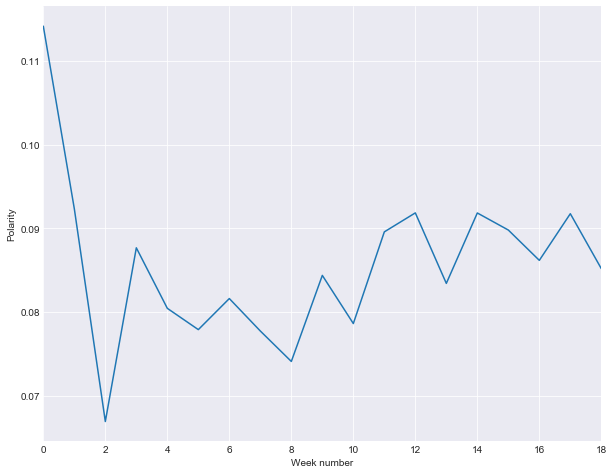

In [70]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

# Plotting the polartiy
data_weekly["polarity"].plot(kind="line", x="date")
plt.xlabel("Week number")
plt.ylabel("Polarity")
plt.show()

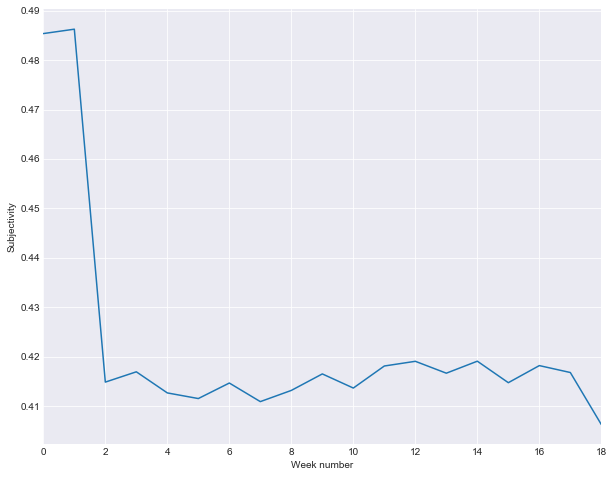

In [71]:
# Plotting the subjectiviy
data_weekly["subjectivity"].plot(kind="line", x="date")
plt.xlabel("Week number")
plt.ylabel("Subjectivity")
plt.show()

# Domain sentiment
How has each domain changed their sentiment over time.

In [156]:
data_domain = copy.deepcopy(data)
data_domain["date"] = pd.to_datetime(data["date"]).dt.strftime("%W")
data_domain = data_domain.groupby("domain", as_index=False, sort=False)
data_domain.head(5)

,content,title,date,domain,url,author,topic_area,polarity,subjectivity
0,so sorry to tell you that you have stage ovari...,My experience of surviving cancer twice,00,medicalnewstoday,https://www.medicalnewstoday.com/articles/327373,Helen Ziatyk,healthcare,0.097308,0.451579
1,if you buy something through link on this page...,Ginger: Health benefits and dietary tips,00,medicalnewstoday,https://www.medicalnewstoday.com/articles/2659...,Jenna Fletcher,healthcare,0.131044,0.519160
2,cluster of more than pneumonia in the central ...,China pneumonia outbreak may be caused by Sars...,01,theguardian,https://www.theguardian.com/science/2020/jan/0...,Reuters,general,0.090905,0.521881
3,at hong international airport are being for my...,New virus identified as likely cause of myster...,01,nature,https://www.nature.com/articles/d41586-020-000...,nature,science,0.069797,0.497991
4,the finding that the outbreak of viral pneumon...,China's Sars-like illness worries health exper...,01,theguardian,https://www.theguardian.com/world/2020/jan/09/...,https://www.theguardian.com/profile/sarahboseley,general,0.102852,0.490368
...,...,...,...,...,...,...,...,...,...
30024,team of from the university of surrey universi...,Backers needed to mass-produce smartphone-base...,13,eenewsautomotive,https://www.eenewsautomotive.com/news/research...,By Julien Happich,automotive,0.133956,0.548620
31617,have been quick to secure new credit the magni...,Automakers reach for credit lines as crisis bi...,13,just-auto,https://www.just-auto.com/comment/automakers-r...,Mike Vousden,automotive,0.135958,0.393272
33123,is head of research at upon by the united worl...,AI Strategy in the Coronavirus Era – a Busines...,13,emerj,https://emerj.com/ai-executive-guides/ai-strat...,Daniel Faggella,tech,0.150539,0.481010
41594,is head of research at upon by the united worl...,How the Coronavirus Will Change AI Innovation ...,14,emerj,https://emerj.com/ai-executive-guides/coronavi...,Daniel Faggella,tech,0.122795,0.466957


In [157]:
# New dataframe with weekly time format
domain_date = data.copy()
domain_date["date"] = pd.to_datetime(data["date"]).dt.strftime("%W")

In [158]:
# Sample of how data is structured now
domain_date[domain_date.domain=="medicalnewstoday"].head(5)

,content,title,date,domain,url,author,topic_area,polarity,subjectivity
0,so sorry to tell you that you have stage ovari...,My experience of surviving cancer twice,00,medicalnewstoday,https://www.medicalnewstoday.com/articles/327373,Helen Ziatyk,healthcare,0.097308,0.451579
1,if you buy something through link on this page...,Ginger: Health benefits and dietary tips,00,medicalnewstoday,https://www.medicalnewstoday.com/articles/2659...,Jenna Fletcher,healthcare,0.131044,0.519160
5,dietitian nutritionist if you buy something th...,Nutrition: Nutrients and the role of the dieti...,01,medicalnewstoday,https://www.medicalnewstoday.com/articles/1607...,Tim Newman,healthcare,0.167961,0.460431
7,anxiety is normal and often healthy emotion ho...,"Anxiety: Overview, symptoms, causes, and treat...",01,medicalnewstoday,https://www.medicalnewstoday.com/info/anxiety/,Adam Felman,healthcare,0.027419,0.464798
1881,it our little boy old and our life the stuff o...,My experience of debilitating dental infections,05,medicalnewstoday,https://www.medicalnewstoday.com/articles/thro...,Pamela Wild,healthcare,0.002156,0.491992


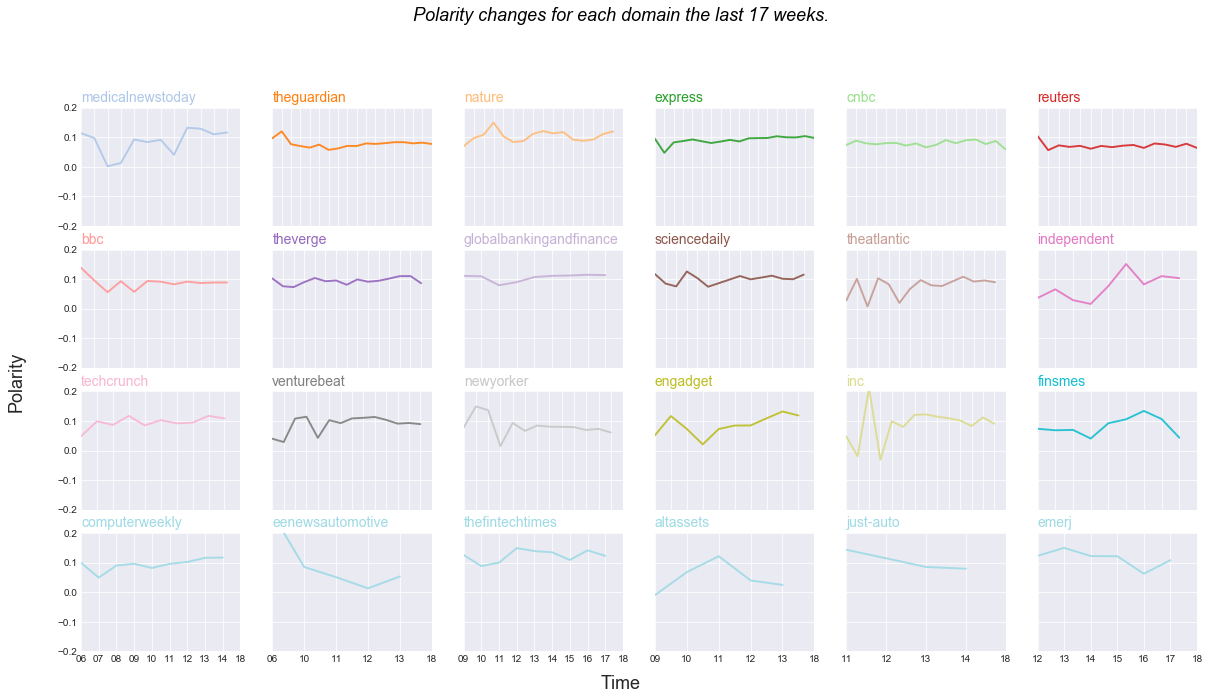

In [159]:
# There is not data for all weeks for some domains, therefore the grid is slighty diffrent for some of the plots.
# However, the plots can still give a general understanding of a trend.

plt.style.use("seaborn-darkgrid")
palette = plt.get_cmap("tab20")

# Multi line plot
num = 0
# This must be before the loop in order to make the whole plot bigger and not just the individual subplots.
fig = plt.figure(figsize=(20,10))

for domain in domain_date.domain.unique():
    # Counter for nubmer of plot
    num+=1
    
    # The spot for the small plot inside the big plot
    plt.subplot(4,6, num)
    # Groups all samples of the current domain by date and calculates the mean value of polarity.
    item = domain_date[domain_date.domain==domain].groupby("date", as_index=False, sort=False).mean()
    # Plots the line
    plt.plot(item.date, item.polarity, marker="", color=palette(num), linewidth=1.9, alpha=0.9, label=domain)
    
    # Set limits.
    # X is the length of date (0-17)
    # Y is, as stated in the beginning, -1 - +1
    plt.xlim(0,domain_date.date.max())
    plt.ylim(-0.2,0.2)
    
    # By default all plots got their own legend ticks, removing those
    if num in range(19):
        plt.tick_params(labelbottom=False)
    if num not in [1,7,13,19]:
        plt.tick_params(labelleft=False)
    
    # The title
    plt.title(domain, loc="left", fontsize=14, fontweight=10, color=palette(num))
    
# general title
plt.suptitle("Polarity changes for each domain the last 17 weeks.", fontsize=18, fontweight=0, color='black', style='italic', y=1.02)

# Axis title
fig.text(0.5, 0.08,"Time",fontsize=18, ha="center", va="center")
fig.text(0.08, 0.5, "Polarity", fontsize=18, ha="center", va="center", rotation="vertical")


plt.show()

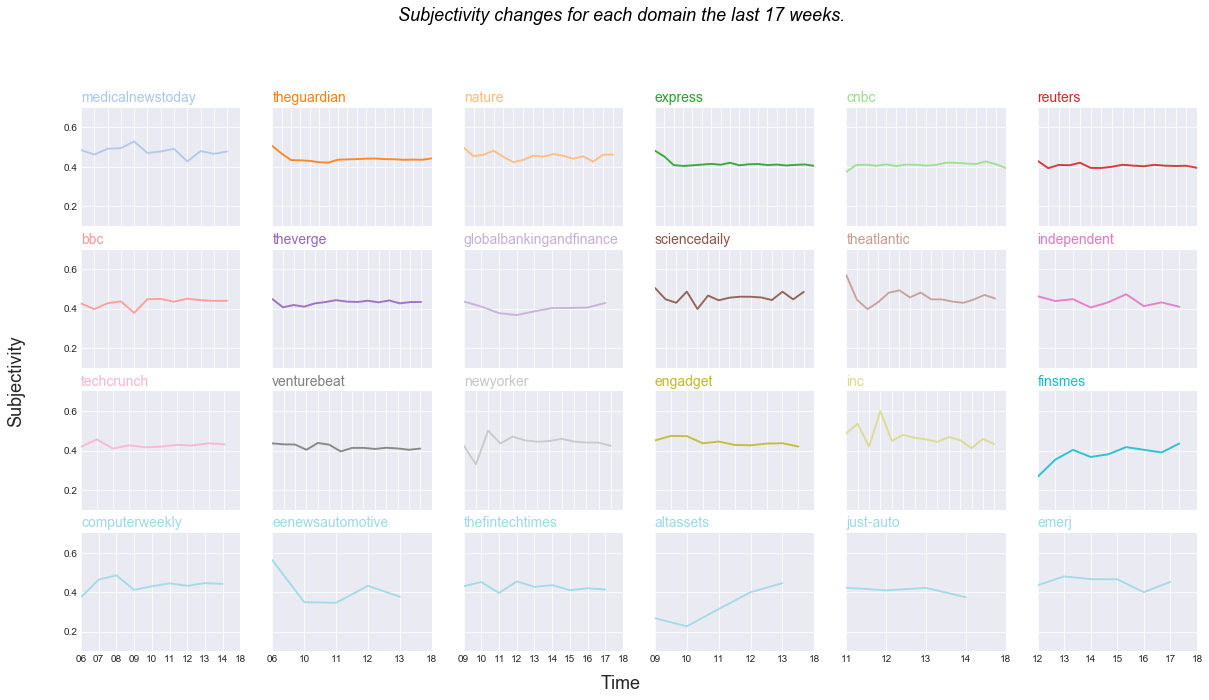

In [160]:
# There is not data for all weeks for some domains, therefore the grid is slighty diffrent for some of the plots.
# However, the plots can still give a general understanding of a trend.

plt.style.use("seaborn-darkgrid")
palette = plt.get_cmap("tab20")

# Multi line plot
num = 0
# This must be before the loop in order to make the whole plot bigger and not just the individual subplots.
fig = plt.figure(figsize=(20,10))

for domain in domain_date.domain.unique():
    # Counter for nubmer of plot
    num+=1
    
    # The spot for the small plot inside the big plot
    plt.subplot(4,6, num)
    # Groups all samples of the current domain by date and calculates the mean value of polarity.
    item = domain_date[domain_date.domain==domain].groupby("date", as_index=False, sort=False).mean()
    # Plots the line
    plt.plot(item.date, item.subjectivity, marker="", color=palette(num), linewidth=1.9, alpha=0.9, label=domain)
    
    # Set limits.
    # X is the length of date (0-17)
    # Y is, as stated in the beginning, -1 - +1
    plt.xlim(0,domain_date.date.max())
    plt.ylim(0.1,0.7)
    
    # By default all plots got their own legend ticks, removing those
    if num in range(19):
        plt.tick_params(labelbottom=False)
    if num not in [1,7,13,19]:
        plt.tick_params(labelleft=False)
    
    # The title
    plt.title(domain, loc="left", fontsize=14, fontweight=10, color=palette(num))
    
# general title
plt.suptitle("Subjectivity changes for each domain the last 17 weeks.", fontsize=18, fontweight=0, color='black', style='italic', y=1.02)

# Axis title
fig.text(0.5, 0.08,"Time",fontsize=18, ha="center", va="center")
fig.text(0.08, 0.5, "Subjectivity", fontsize=18, ha="center", va="center", rotation="vertical")


plt.show()

ConversionError: Failed to convert value(s) to axis units: 0            medicalnewstoday
1                 theguardian
2                      nature
3                     express
4                        cnbc
5                     reuters
6                         bbc
7                    theverge
8     globalbankingandfinance
9                sciencedaily
10                theatlantic
11                independent
12                 techcrunch
13                venturebeat
14                  newyorker
15                   engadget
16                        inc
17                    finsmes
18             computerweekly
19           eenewsautomotive
20            thefintechtimes
21                  altassets
22                  just-auto
23                      emerj
Name: domain, dtype: object

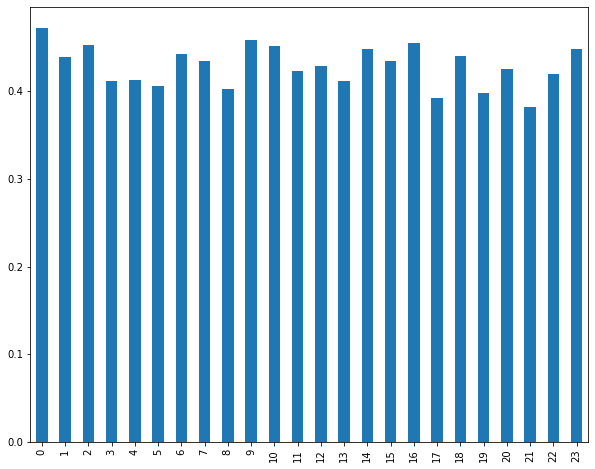

In [31]:
data_domain["subjectivity"].plot(kind="bar", x="domain")
plt.xticks(data_domain["domain"])
plt.xlabel("Domain")
ply.ylabel("Subjectivity")
plt.show()

# Topic area sentiment
How has each topic area changed their sentiment over time.